In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage , dendrogram , fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

def generate_trajectories (n_trajectories=50, random_state=42) :
    """ Generuje syntetyczne trajektorie GPS ."""
    np.random.seed(random_state)
    trajectories = []
    # Typ 1: Trasa do centrum (z roznych stron)
    for _ in range (15) :
        length = np.random.randint(20, 40)
        start = np.random.randn(2) * 5 + [10, 10]
        end = np.array([0, 0]) # centrum
        t = np.linspace(0, 1, length ).reshape(-1, 1)
        traj = start + t * (end - start) + np.random.randn(length, 2) * 0.3
        trajectories.append(traj)
    # Typ 2: Trasa rekreacyjna ( petla )
    for _ in range(15):
        length = np.random.randint(30, 50)
        t = np.linspace(0, 2*np.pi, length)
        r = 3 + np.random.rand() * 2
        traj = np.column_stack([r * np.cos(t), r * np.sin(t)])
        traj += np.random.randn(length, 2) * 0.2
        trajectories.append(traj)
    # Typ 3: Trasa wzdluz rzeki ( liniowa )
    for _ in range(20):
        length = np.random.randint(25, 45)
        start_x = np.random.rand() * 10 - 5
        traj = np.column_stack ([
            np.linspace(start_x, start_x + 8, length),
            np.sin(np.linspace(0, np.pi, length)) * 2
        ])
        traj += np.random.randn(length, 2) * 0.2
        trajectories.append(traj)
    return trajectories

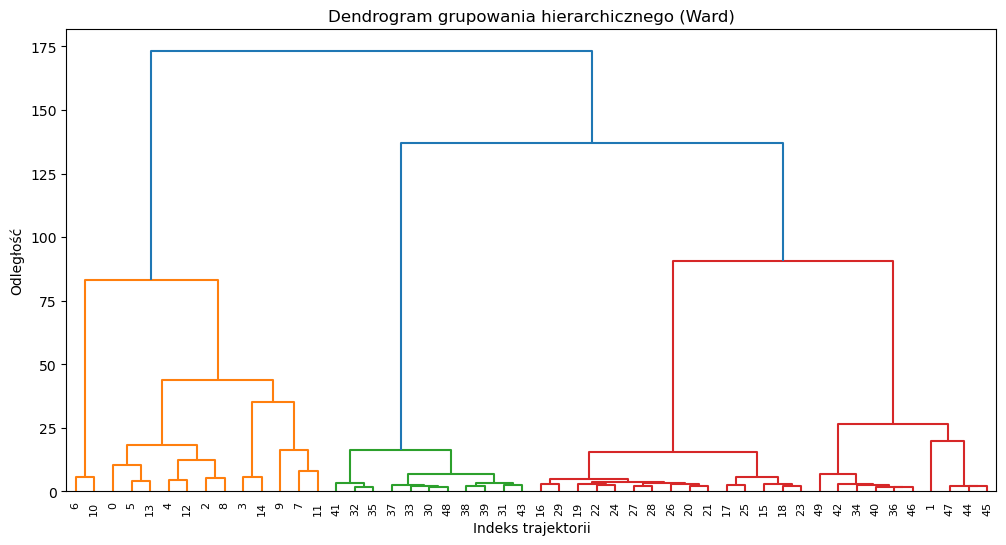

In [2]:
from dtaidistance import dtw

def compute_dtw_distance_matrix(trajectories):
    n = len(trajectories)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            # Obliczanie odległości DTW między trajektoriami i oraz j
            dist = dtw.distance_fast(trajectories[i], trajectories[j], use_ndim=True)
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist
    return distance_matrix

trajectories = generate_trajectories()
distance_matrix = compute_dtw_distance_matrix(trajectories)

condensed_dist = squareform(distance_matrix)  # Konwersja na formę skondensowaną
Z = linkage(condensed_dist, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram grupowania hierarchicznego (Ward)')
plt.xlabel('Indeks trajektorii')
plt.ylabel('Odległość')
plt.show()



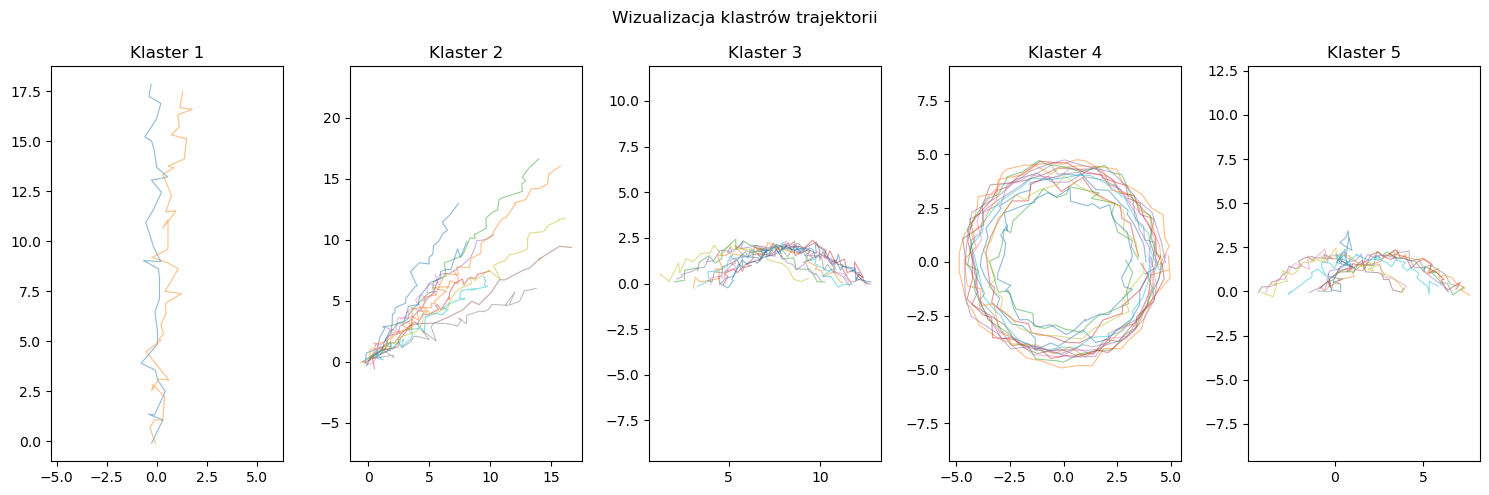

In [7]:
num_clusters = 5
clusters = fcluster(Z, num_clusters, criterion='maxclust')

plt.figure(figsize=(15, 5))
for cluster_id in range(1, num_clusters + 1):
    plt.subplot(1, num_clusters, cluster_id)
    cluster_trajectories = [trajectories[i] for i in range(len(trajectories)) if clusters[i] == cluster_id]
    
    for traj in cluster_trajectories:
        plt.plot(traj[:, 0], traj[:, 1], alpha=0.5, linewidth=0.8)
    
    plt.title(f'Klaster {cluster_id}')
    plt.axis('equal')

plt.suptitle('Wizualizacja klastrów trajektorii')
plt.tight_layout()
plt.show()